In [40]:
import vaex
import illustris_python as il
import numpy as np
import matplotlib as mpl
import shared
import matplotlib.pyplot as plt
from itertools import islice

In [2]:
base_path = "/Users/users/nastase/PROJECT/"

In [70]:
def random_sample_particles(snapshot, x_min, x_max, y_min, y_max): #, z_min, z_max
    
    
    # Assuming dm_pos is a dictionary with keys 'Coordinates' and 'ParticleIDs'
    dm_pos = il.snapshot.loadSubset(base_path, snapshot, 'dm', ['Coordinates', 'ParticleIDs'])

    # Extracting coordinates
    coordinates = dm_pos['Coordinates']
    particle_ids = dm_pos['ParticleIDs']
    x_coords = coordinates[:, 0]
    y_coords = coordinates[:, 1]
#     z_coords = coordinates[:, 2]

    # Finding indices of particles within the specified range
    indices = np.where(
        (x_coords >= x_min) & (x_coords <= x_max) &
        (y_coords >= y_min) & (y_coords <= y_max) #&
#         (z_coords >= z_min) & (z_coords <= z_max)
    )[0]
    
    particles_within_range = {
        'ParticleIDs': particle_ids[indices],
        'Coordinates': coordinates[indices]
    } 
    
    redshift = snapshot_redshifts.get(snapshot)
    plt.hist2d(particles_within_range['Coordinates'][:,0], particles_within_range['Coordinates'][:,1], norm=mpl.colors.LogNorm(), bins=256)
    plt.title(f'DM distribution at snapshot:{snapshot}, z = {redshift}')
    plt.xlabel('x [ckpc/h]')
    plt.ylabel('y [ckpc/h]')
    plt.colorbar()
    plt.savefig(f'Data/W2_mass_movements/DM_movements_now_to_earlier/node1.{snapshot}.png')
    
    plt.close()


    return particles_within_range

In [71]:
for snapshot_number in islice(snapshot_redshifts.keys(), 5):
    random_sample_particles(snapshot_number, 15000, 25000, 40000, 50000)
    

In [72]:
for snapshot_number in snapshot_redshifts.keys():
    random_sample_particles(snapshot_number, 15000, 25000, 40000, 50000)

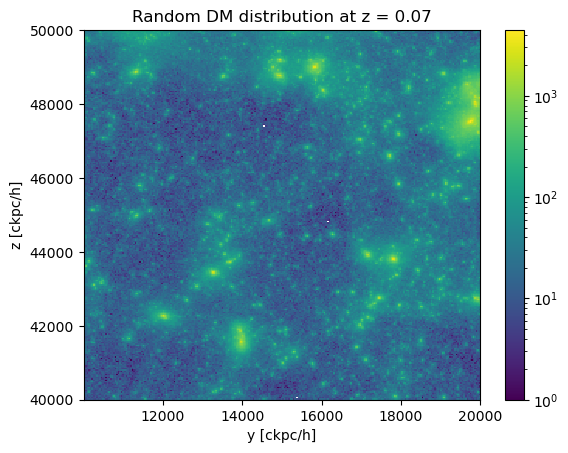

In [12]:
plt.hist2d(particles['Coordinates'][:,0], particles['Coordinates'][:,1], norm=mpl.colors.LogNorm(), bins=512)
# plt.xlim([0,75000])
# plt.ylim([0,75000])
plt.title(f'Random DM distribution at z = {}')
plt.xlabel('y [ckpc/h]')
plt.ylabel('z [ckpc/h]')
plt.colorbar()
# plt.savefig('Data/W2_mass_movements/random_matter_129.png')